[Reference](https://python.plainenglish.io/minimizing-chart-junk-4-tips-for-clean-data-visualizationswith-python-6ff91b942896)

In [1]:
pip install gapminder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from gapminder import gapminder
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


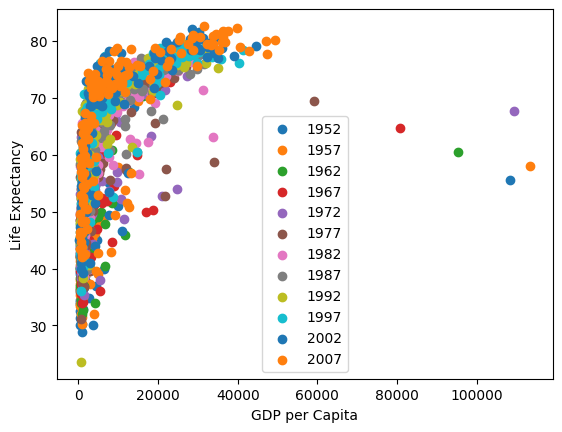

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from gapminder import gapminder

# Load the dataset
df = gapminder
# Create a scatter plot for each year
for year in df['year'].unique():
    yearly_data = df[df['year'] == year]
    plt.scatter(yearly_data['gdpPercap'], yearly_data['lifeExp'], label=str(year))
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.legend(loc='best')
plt.show()

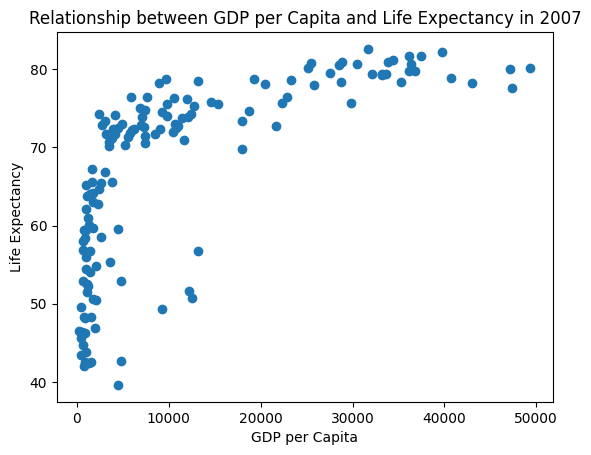

In [4]:
# Load the dataset
df = gapminder

# Filter the data to only include the year 2007
df_2007 = df[df['year'] == 2007]
# Create a scatter plot
plt.scatter(df_2007['gdpPercap'], df_2007['lifeExp'])
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.title('Relationship between GDP per Capita and Life Expectancy in 2007')
plt.show()

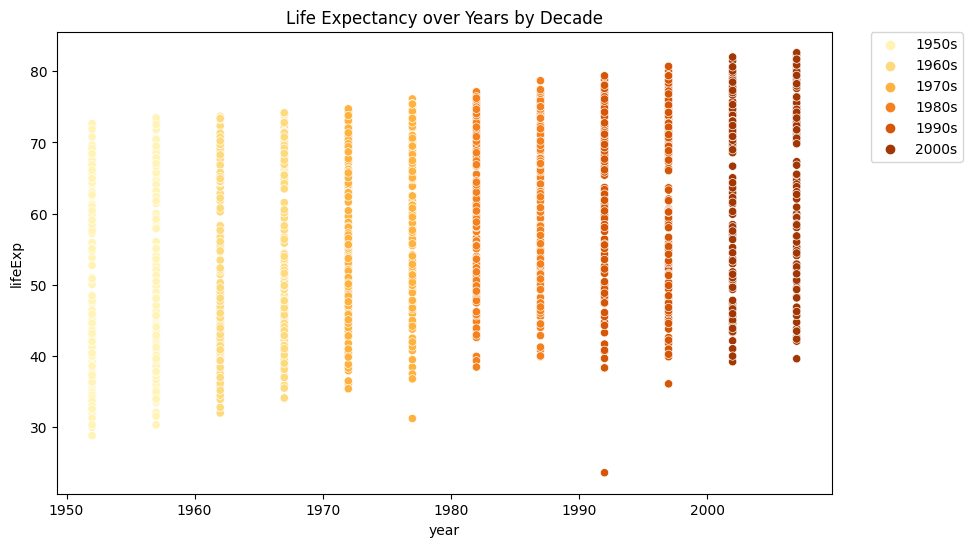

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from gapminder import gapminder

# Load the dataset
df = gapminder

# Create a new column that categorizes year into decades
gapminder['decade'] = gapminder['year'].apply(lambda x: str(x)[:3]+"0s")

# Create the plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='year', y='lifeExp', hue='decade', data=gapminder, palette='YlOrBr')

plt.title('Life Expectancy over Years by Decade')

# Move the legend to an upper right corner
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

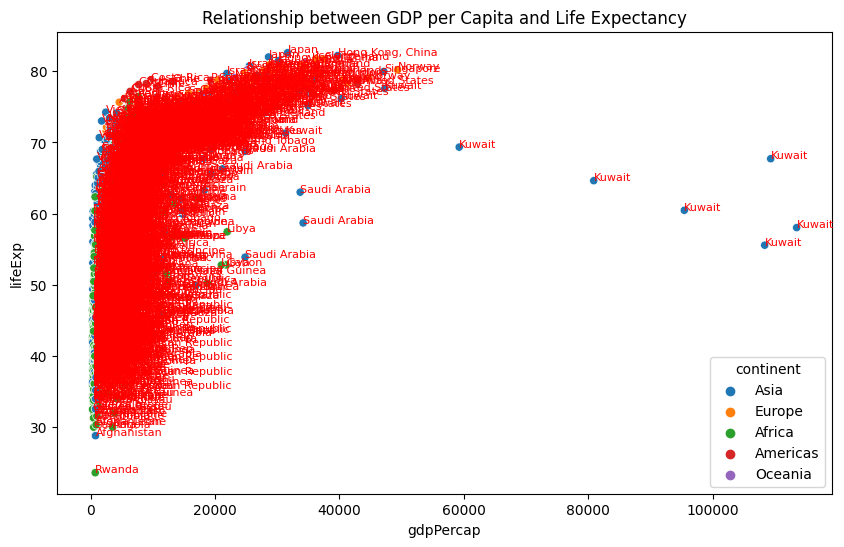

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdpPercap', y='lifeExp', hue='continent', data=gapminder)

# Annotating each point with its corresponding country
for i in range(gapminder.shape[0]):
    plt.text(x=gapminder.gdpPercap[i]+0.3, y=gapminder.lifeExp[i], s=gapminder.country[i], fontdict=dict(color='red', size=8))
plt.title('Relationship between GDP per Capita and Life Expectancy')
plt.show()

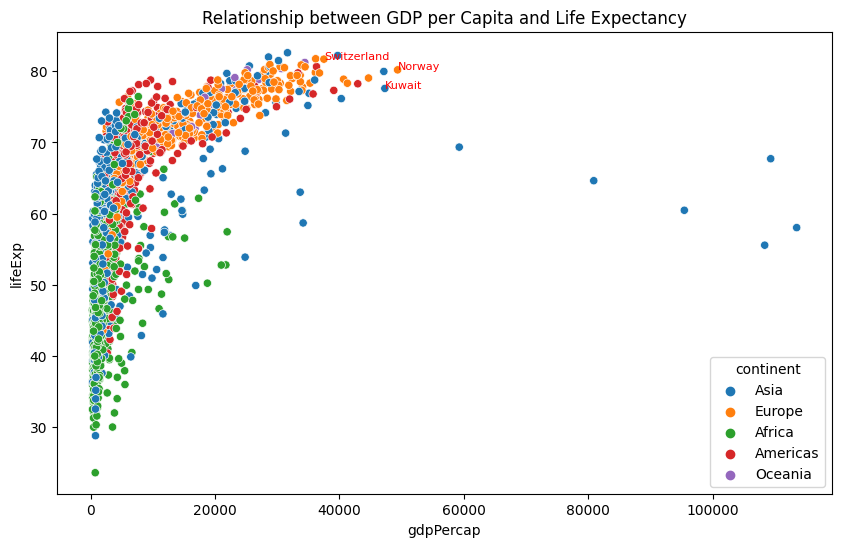

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdpPercap', y='lifeExp', hue='continent', data=gapminder)

# Annotating a few points of interest
outliers = ['Kuwait', 'Norway', 'Switzerland']
for country in outliers:
    data = gapminder[gapminder['country'] == country].iloc[-1]
    plt.text(x=data.gdpPercap+0.3, y=data.lifeExp, s=country, fontdict=dict(color='red', size=8))
plt.title('Relationship between GDP per Capita and Life Expectancy')
plt.show()

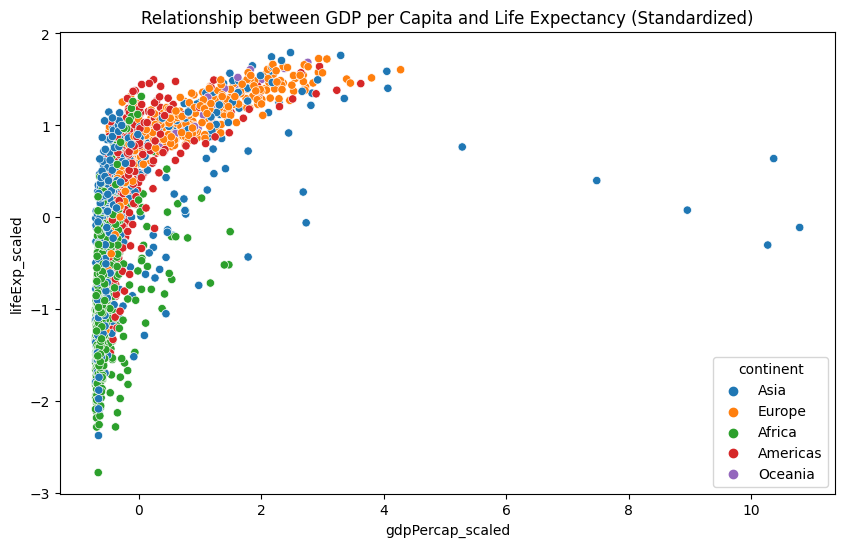

In [8]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from gapminder import gapminder
# Load the dataset
df = gapminder

scaler = StandardScaler()
scaled_df = scaler.fit_transform(gapminder[['gdpPercap', 'lifeExp']])
scaled_df = pd.DataFrame(scaled_df, columns=['gdpPercap_scaled', 'lifeExp_scaled'])
gapminder_scaled = pd.concat([gapminder, scaled_df], axis=1)
# Let's plot the standardized variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdpPercap_scaled', y='lifeExp_scaled', hue='continent', data=gapminder_scaled)
plt.title('Relationship between GDP per Capita and Life Expectancy (Standardized)')
plt.show()